# CH03 머신러닝 핵심 알고리즘(지도학습, 비지도 학습)

# 3.1 지도학습

분류는 이산형 데이터에, 회귀는 보통 연속형 데이터에


# 3.1.1 K-최근접 이웃

## 라이브러리 호출 및 데이터 정리

In [5]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn import metrics
import os

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('/media/seungho/53b8a3a8-75cd-4363-9fed-296ae95f1c27/code_study/080289/chap03/data/iris.data', names=names)

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
s.fit(X_test)
X_test = s.transform(X_test)



KNeighborsClassifier(n_neighbors=50)

## 모델 생성 및 훈련

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.9666666666666667


/home/seungho/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 최적의 K값 찾기

In [14]:
k = 10
acc_arr = np.zeros(k)
for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_arr[k-1] = acc

max_acc = np.amax(acc_arr)
acc_list = list(acc_arr)
k = acc_list.index(max_acc)
print("정확도", max_acc, "인 최적의 K는", k+1, "입니다")

정확도 1.0 인 최적의 K는 4 입니다


/home/seungho/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/seungho/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

# 3.1.2 서포트 벡터 머신

결정경계: 분류하기 위한 기준선 <br>
마진(margin):  결정경계와 서포트 벡터 사이의 거리<br>
서포트 벡터(support vector): 결정경계와 가장 가까이 있는 데이터


이상치 허용 -> soft margin <br>
이상치 허용X -> hard margin

## 라이브러리 호출

In [18]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
# import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## train/test split

In [20]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)


In [21]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) # C값 클수록 hard margin 작을수록 soft margin, gamma: 결정경계 얼마나 유연하게 가져갈지(너무 크면 overfitting 발생 가능)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


# 3.1.3 결정트리

N차 분류 후 순도 증가, 불순도/불확실성 감소하는 방향으로 학습 진행

### 엔트로피

확률변수 불확실성을 수치로 나타낸 것 -> 엔트로피 높을수록 불확실성 높음

### 지니 계수

불순도 측정하는 지표, 엔트로피보다 계산 빠름

## 라이브러리 호출

In [23]:
import pandas as pd
df = pd.read_csv('/media/seungho/53b8a3a8-75cd-4363-9fed-296ae95f1c27/code_study/080289/chap03/data/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data preprocessing

In [24]:
df = df [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']

## train/test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 모델 생성/훈련/예측

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8212290502793296

## 혼동 행렬

In [28]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,18,49


# 3.1.4 로지스틱 회귀, 선형 회귀

일반적인 회귀 분석 -> 연속형 변수, 최소제곱법, F-test, t-test 이용 <br>
로지스틱 회귀 분석 -> 이산형 변수, 최대우도법, X^2 test

### 로지스틱 회귀

1. 각 집단에 속하는 확률의 추정치를 예측
2. 분류 기준 값을 설정한 후 특정  범주로 분류

## 라이브러리 호출

In [29]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits .target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


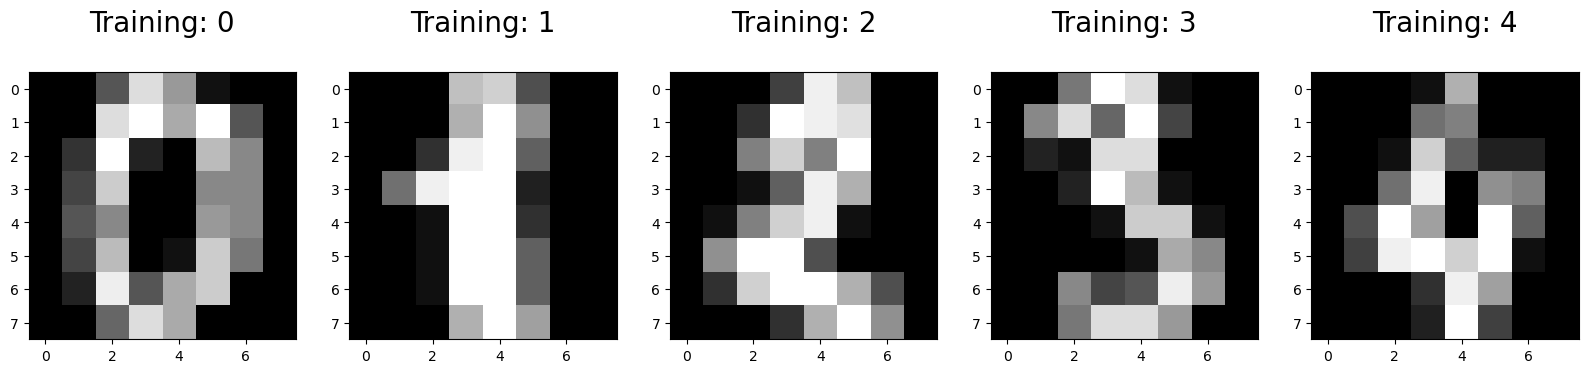

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

## Train/Test split, 모델 생성, 훈련, 예측

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
lR = LogisticRegression()
lR.fit(x_train, y_train)

predictions = lR.predict(x_test)
score = lR.score(x_test, y_test)

print(score)


0.9511111111111111


/home/seungho/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


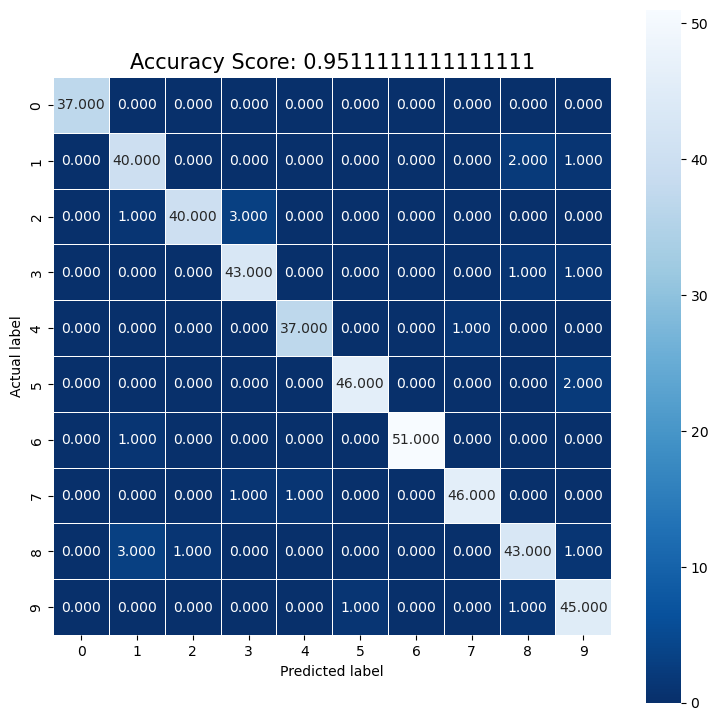

In [36]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

### 선형회귀

종속변수와 독립변수 사이의 관계를 설정하는 데에 이용

## 라이브러리 호출

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## 데이터셋 불러오기 및 시각화

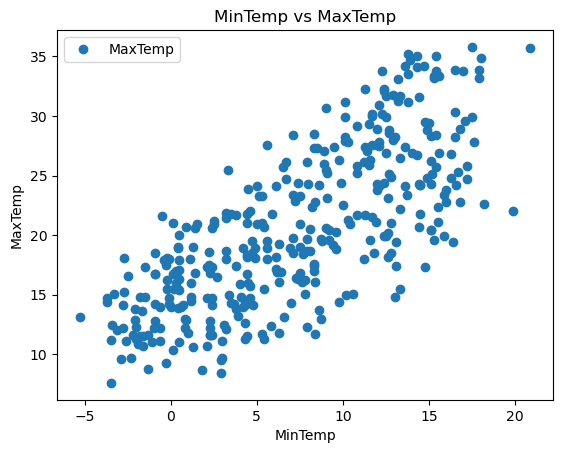

In [38]:
dataset = pd.read_csv('/media/seungho/53b8a3a8-75cd-4363-9fed-296ae95f1c27/code_study/080289/chap03/data/weather.csv')
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

## 선형 회귀 모델 생성/훈련/예측 및 회귀선 표현

In [39]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,14.2,17.642013
1,15.5,14.822200
2,12.3,12.771427
3,14.1,18.154706
4,19.0,15.591240
...,...,...
69,19.4,28.494019
70,16.8,16.445729
71,22.4,21.487212
72,30.2,24.990615


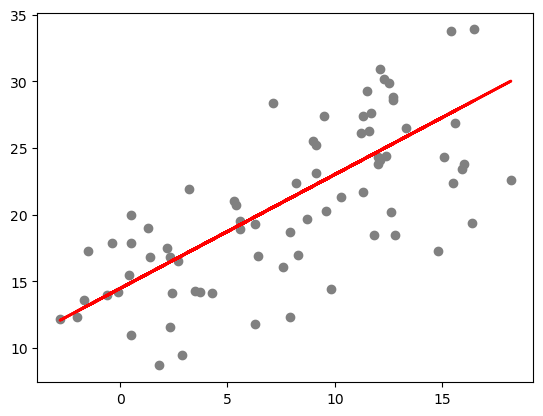

In [40]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [41]:
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 18.388613355115687
RMSE: 4.288194649863237


# 3.2 비지도 학습

군집 -> 목표: 데이터 그룹화, 주요 알고리즘: K-평균 군집화 <br>
차원 축소 -> 목표: 데이터 간소화, 주요 알고리즘: PCA

# 3.2.1 K-평균 군집화

1. 중심점 선택 <br>
2. 클러스터 할당 <br> 
3. 새론운 중심점 선택 <br>
4. 범위 확인 -> 변화 없으면 멈추고 있으면 2, 3 반복

데이터가 비선형이거나 군집 크기가 다를 때, 군집마다 밀집도와 거리가 다를 때는 사용하지 않는 것이 좋음

## 라이브러리 호출

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 데이터 로드

In [43]:
data = pd.read_csv('/media/seungho/53b8a3a8-75cd-4363-9fed-296ae95f1c27/code_study/080289/chap03/data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data preprocessing

In [44]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [45]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

## 적당한 K값 추출

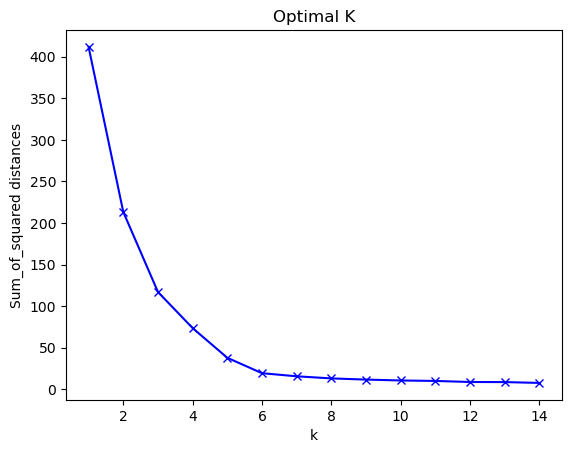

In [48]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared distances')
plt.title('Optimal K')
plt.show()

# 3.2.2 밀도 기반 군집 분석

클러스터 숫자 알지 못하고 이상치 많이 포함되었을 때 사용

1. 엡실론 내 점 개수 확인 및 중심점 결정 <br>
2. 군집 확장
3. 1~2단계 반복
4. 노이즈 정의

# 3.2.3 주성분 분석(PCA)

고차원 데이터 저차원으로 축소

데이터들의 분포 특성을 잘 설명하는 벡터를 두 개 선택 <br>
벡터 두 개를 위한 적정한 가중치를 찾을 떄까지 학습을 진행

## 라이브러리 호출

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [50]:
X = pd.read_csv('/media/seungho/53b8a3a8-75cd-4363-9fed-296ae95f1c27/code_study/080289/chap03/data/credit card.csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
X.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data preprocessing

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481656,-0.097613
4,-0.563512,-0.482505


## 시각화

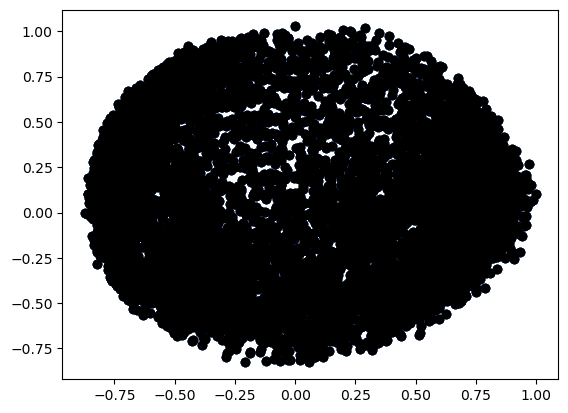

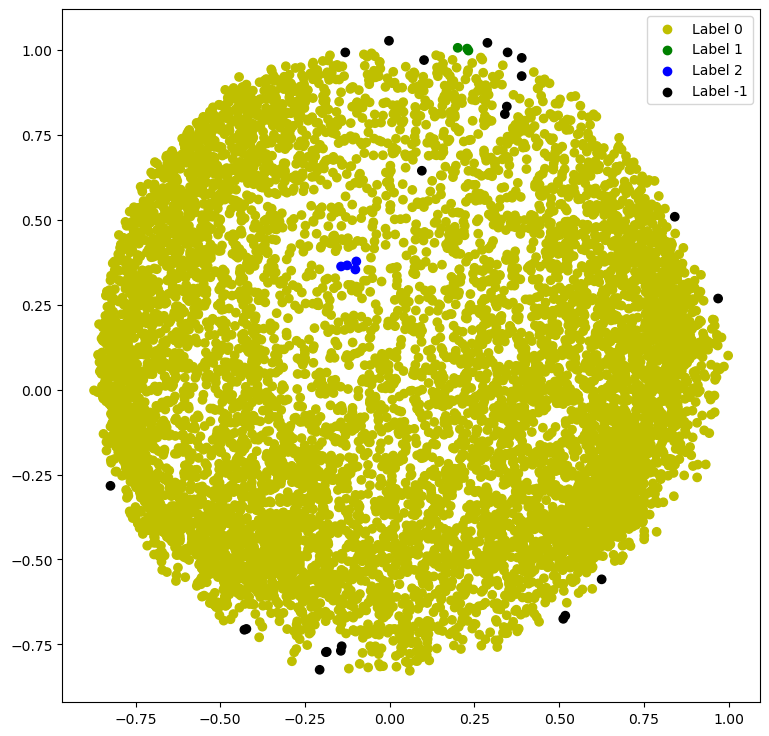

In [52]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

## 모델 튜닝

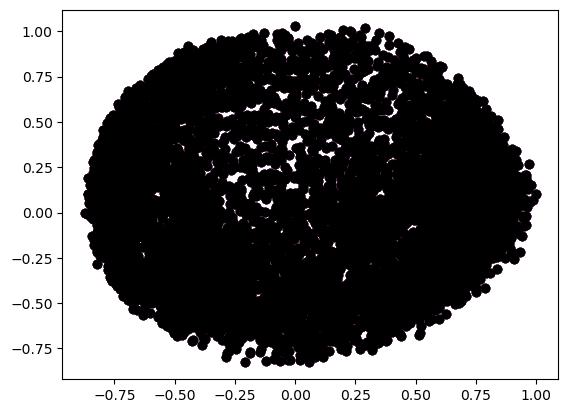

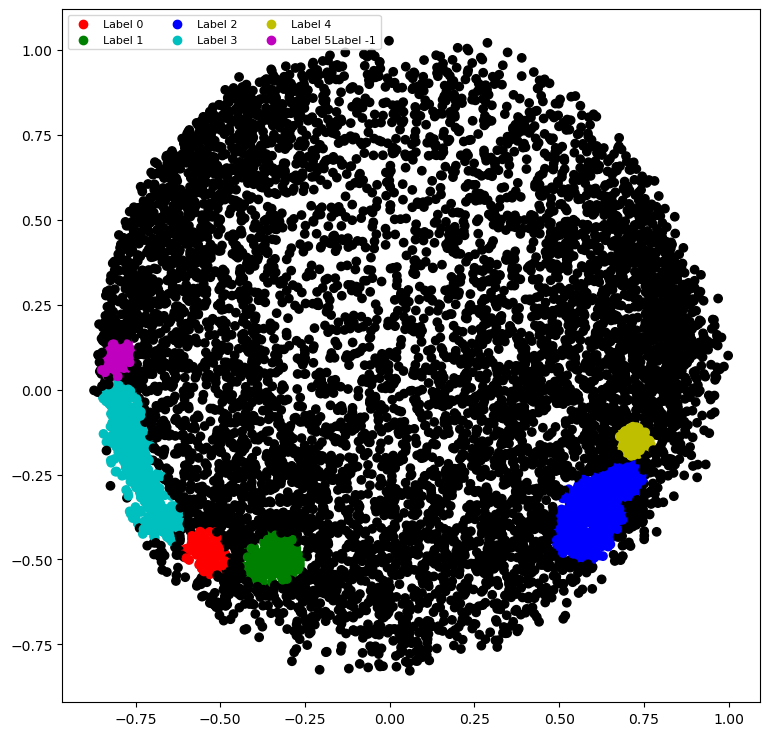

In [56]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1] 
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[0]);
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[1]);
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[2]);
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[3]);
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[4]);
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[5]);
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[-1]);

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5' 'Label -1'), scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.show()